<a href="https://colab.research.google.com/github/mryamaho/MLprojects/blob/main/AhmadRidhuanAli_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #for mathematic formulas
import pandas as pd #to process data

In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/Assignment1/customer_churn_dataset-testing-master.csv"

data = pd.read_csv(path) #we create a var called data that reads in the dataset uploaded onto gdrive
#we also use the pandas library to read in the dataset

In [6]:
data #calling in to view the data that we have uploaded

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [9]:
#to see the columns we can use as our predictors
#churn will be our target column
for col in data.columns:
    print(col)

CustomerID
Age
Gender
Tenure
Usage Frequency
Support Calls
Payment Delay
Subscription Type
Contract Length
Total Spend
Last Interaction
Churn


In [16]:
#checking for null values in our dataset
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [15]:
#checking for null values in our dataset
data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [26]:
#seems like there are no null values and no empty values but if there were any empty or null values present i would use this
#replace() function

#to perform z score normalisation
mean_last_interaction = data["Last Interaction"].mean()
std_dev_last_interaction = data["Last Interaction"].std()

data["Last Interaction Z-score"] = (data["Last Interaction"] - mean_last_interaction) / std_dev_last_interaction

# Calculate the mean and variance of the normalized values
mean_last_interaction_zscore = data["Last Interaction Z-score"].mean()
variance_last_interaction_zscore = data["Last Interaction Z-score"].var()

# Display the mean and variance of the normalized values
print("Mean of Last Interaction Z-score:", mean_last_interaction_zscore)
print("Variance of Last Interaction Z-score:", variance_last_interaction_zscore)

Mean of Last Interaction Z-score: 2.6932057589316252e-17
Variance of Last Interaction Z-score: 1.0000000000000004


In the context of z-score normalization, the mean of the normalized values is expected to be very close to zero, typically close to 0 (within a small range like 1e-15) due to the nature of the z-score formula. Similarly, the variance should be very close to 1, but slight deviations from 1 might occur due to floating-point precision errors.

The mean being close to zero indicates that the data has been centered around zero, which is one of the main goals of z-score normalization. By subtracting the mean and dividing by the standard deviation, the data's distribution is transformed to have a mean of zero and a standard deviation of one, making it easier to compare and interpret.

The variance being close to 1 suggests that the spread of the normalized values is similar to the original data. Since z-score normalization maintains the relative distances between data points, it doesn't significantly change the variance.

In summary, the mean being close to zero and the variance being close to 1 indicate that the z-score normalization process has been applied correctly, and the data is now centered around zero with a standard deviation of one. This normalization allows for more meaningful comparisons and analysis of the data.

In [19]:
data
#here we can see the updated table with the new z score columns

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Last Interaction Z-score
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,-0.752318
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,0.521061
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,0.636822
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,0.289537
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,0.289537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1,-0.173509
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1,-0.752318
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1,0.521061
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1,-0.289271


In [21]:
#to create the bins we can use  the pandas qcut() function
num_bins = 5

# Use qcut to create five bins for "Total Spend"
data['Total Spend Bins'], bin_edges = pd.qcut(data['Total Spend'], num_bins, labels=False, retbins=True)


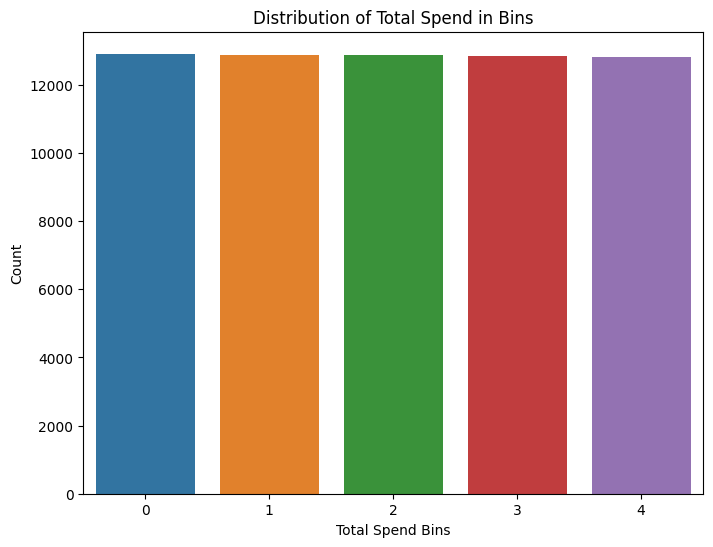

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Total Spend Bins', data=data)
plt.xlabel('Total Spend Bins')
plt.ylabel('Count')
plt.title('Distribution of Total Spend in Bins')
plt.show()
# here we can see that the distribution of the bins is approximately the same

In [24]:
# Apply one-hot encoding to the 'Contract Length' attribute
contract_length_encoded = pd.get_dummies(data['Contract Length'], prefix='Contract')

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, contract_length_encoded], axis=1)

data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Last Interaction Z-score,Total Spend Bins,Contract_Annual,Contract_Monthly,Contract_Quarterly
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,-0.752318,2,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,0.521061,2,0,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,0.636822,3,1,0,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,0.289537,0,0,0,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,0.289537,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1,-0.173509,4,0,0,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1,-0.752318,4,1,0,0
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1,0.521061,1,0,1,0
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1,-0.289271,2,0,1,0


One new attribute that can be defined based on existing attributes is the "Average Usage Frequency per Support Call". This attribute represents the average number of times a customer uses the service per support call they make.

To calculate this new attribute, we can use the existing attributes "Usage Frequency" and "Support Calls". The formula for calculating the average usage frequency per support call for each customer is:

Average Usage Frequency per Support Call = Usage Frequency / Support Calls

The reason behind defining this attribute is to understand the level of customer engagement and how frequently they use the service in relation to the number of support calls they make. It can provide insights into how effectively the service meets customer needs and whether customers are satisfied with the support provided.

A high value for this new attribute may indicate that customers use the service frequently and require less support, suggesting a high level of satisfaction. On the other hand, a low value may indicate that customers make many support calls, implying possible issues or dissatisfaction with the service.

This new attribute can help in customer segmentation and identifying patterns of behavior. It can be used as a predictor in machine learning models to predict customer churn or to understand factors that influence customer loyalty. Additionally, it can be helpful in improving customer support and tailoring service offerings to meet customer needs more effectively.

In [25]:
#defining a new attribute

# Calculate the new attribute
data['Average Usage Frequency per Support Call'] = data['Usage Frequency'] / data['Support Calls']

data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Last Interaction Z-score,Total Spend Bins,Contract_Annual,Contract_Monthly,Contract_Quarterly,Average Usage Frequency per Support Call
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,-0.752318,2,0,1,0,3.500000
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,0.521061,2,0,1,0,4.000000
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,0.636822,3,1,0,0,5.000000
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,0.289537,0,0,0,1,2.400000
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,0.289537,2,1,0,0,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1,-0.173509,4,0,0,1,2.000000
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1,-0.752318,4,1,0,0,0.200000
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1,0.521061,1,0,1,0,1.750000
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1,-0.289271,2,0,1,0,2.714286


In [27]:
#END OF TASK 1